In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df = pd.read_csv('adult.data', names =['Age','Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Marital Status', 
                                 'Occupation', 'Relationship', 'Race', 'Gender', 'Capital Gain', 'Capital Loss',
                                 'Hours per week', 'Country', 'Target'],sep =r'\s*,\s*', na_values ='?', engine = 'python')

In [3]:
df.head()
df.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


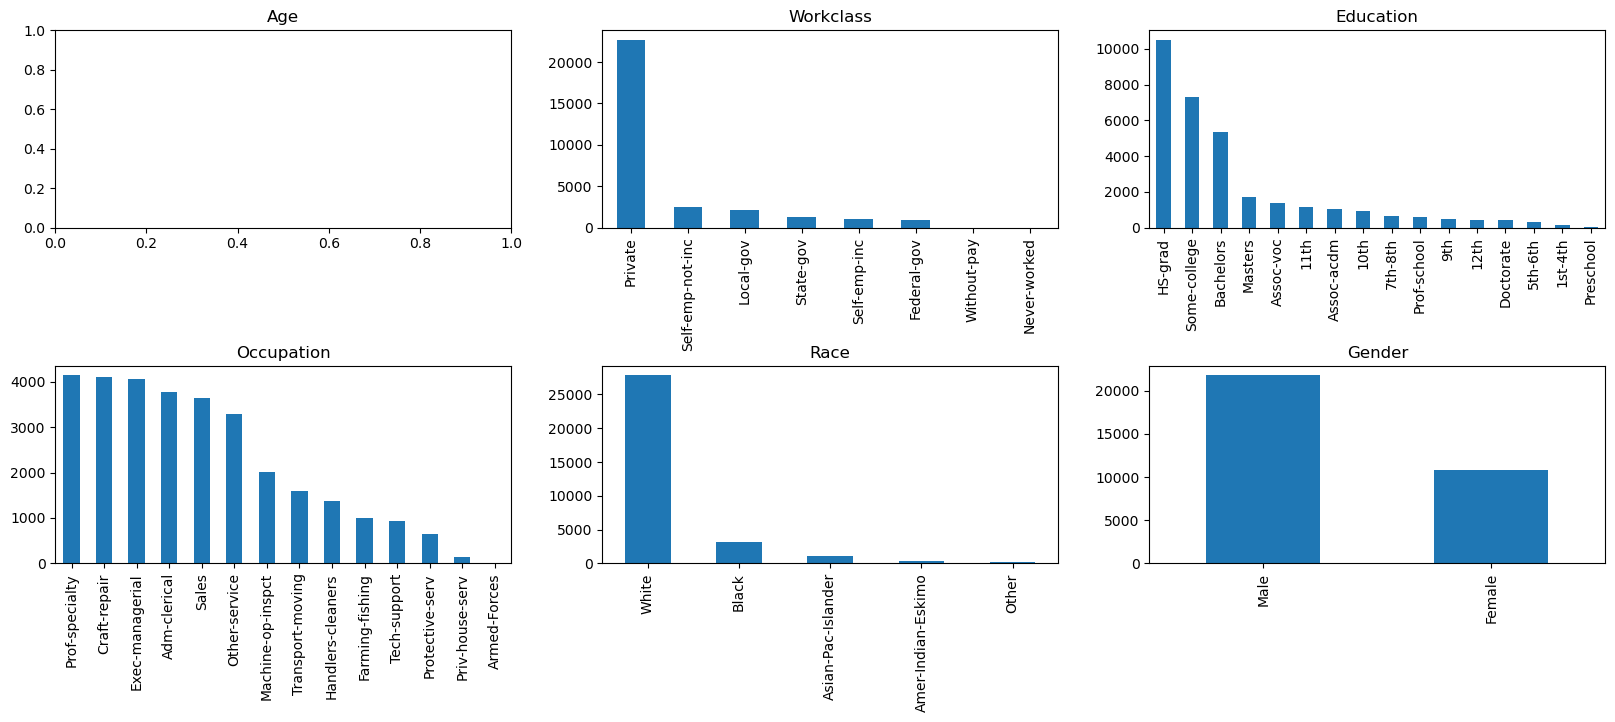

In [6]:
fig = plt.figure(figsize =(20,20))
cols =3
rows = math.ceil(float(df.shape[1]/cols))
for i, column in enumerate(['Age','Workclass','Education','Occupation','Race','Gender']):
    ax=fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if df.dtypes[column]==object:
        df[column].value_counts().plot(kind='bar', axes=ax);
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()
    

In [7]:
df['Occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [8]:
import sklearn.preprocessing as preprocessing

le = preprocessing.LabelEncoder()
df['Occupation']=le.fit_transform(df['Occupation'].astype(str))
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df['Occupation'].unique()

array([ 0,  3,  5,  9,  7, 11,  2, 13,  4,  6, 12, 14, 10,  1,  8])

In [10]:
df['Target'] = le.fit_transform(df['Target'].astype(str))
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,0


In [11]:
df['Target'].unique()

array([0, 1])

<Axes: xlabel='Education-Num'>

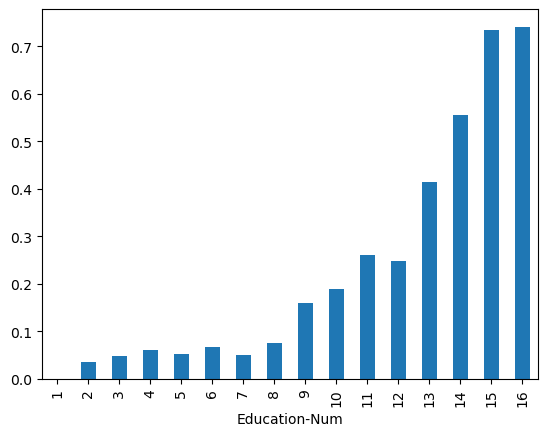

In [12]:
df.groupby('Education-Num').Target.mean().plot(kind='bar')


In [13]:
# machine learning part
# Take only the feature that is req for now

from sklearn.model_selection import train_test_split
x=df[['Education-Num','Occupation']]
y=df['Target']

# Split data by 80:20 for Training:Testing

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)

In [14]:
# import the SVM model, SVC C Support vector classification
from sklearn.svm import SVC

# declare the SVC with no tuning
classifier=SVC()

#Fitting the data or training the SVM
classifier.fit(x_train, y_train)

#Predicting the result and giving accuracy
score = classifier.score(x_test, y_test)
print(score)



0.7879625364655305


C:\Users\Admin\AppData\Local\Temp\ipykernel_2516\2081987389.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df.corr()


,Age,fnlwgt,Education-Num,Occupation,Capital Gain,Capital Loss,Hours per week,Target
Age,1.000000,-0.076646,0.036527,0.012626,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,-0.000521,0.000432,-0.010252,-0.018768,-0.009463
Education-Num,0.036527,-0.043195,1.000000,0.044096,0.122630,0.079923,0.148123,0.335154
Occupation,0.012626,-0.000521,0.044096,1.000000,0.012350,0.004540,-0.056995,0.010802
Capital Gain,0.077674,0.000432,0.122630,0.012350,1.000000,-0.031615,0.078409,0.223329
Capital Loss,0.057775,-0.010252,0.079923,0.004540,-0.031615,1.000000,0.054256,0.150526
Hours per week,0.068756,-0.018768,0.148123,-0.056995,0.078409,0.054256,1.000000,0.229689
Target,0.234037,-0.009463,0.335154,0.010802,0.223329,0.150526,0.229689,1.000000


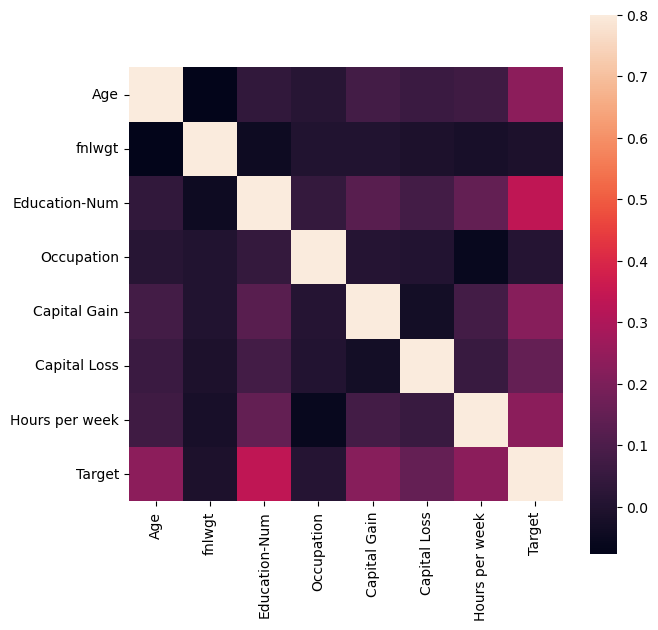

In [15]:
# plotting a correlation matrix to understand the data

corrmat=df.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=0.8, square=True)
corrmat

C:\Users\Admin\AppData\Local\Temp\ipykernel_2516\1737541292.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df.corr()


,Age,fnlwgt,Education-Num,Occupation,Capital Gain,Capital Loss,Hours per week,Target
Age,1.000000,-0.076646,0.036527,0.012626,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,-0.000521,0.000432,-0.010252,-0.018768,-0.009463
Education-Num,0.036527,-0.043195,1.000000,0.044096,0.122630,0.079923,0.148123,0.335154
Occupation,0.012626,-0.000521,0.044096,1.000000,0.012350,0.004540,-0.056995,0.010802
Capital Gain,0.077674,0.000432,0.122630,0.012350,1.000000,-0.031615,0.078409,0.223329
Capital Loss,0.057775,-0.010252,0.079923,0.004540,-0.031615,1.000000,0.054256,0.150526
Hours per week,0.068756,-0.018768,0.148123,-0.056995,0.078409,0.054256,1.000000,0.229689
Target,0.234037,-0.009463,0.335154,0.010802,0.223329,0.150526,0.229689,1.000000


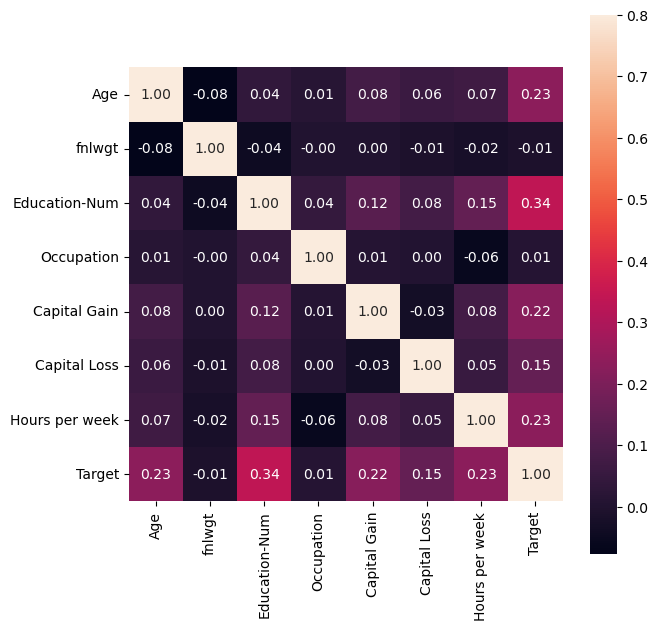

In [16]:
# replot with annotation

corrmat=df.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt='.2f')
corrmat

In [17]:
df['Gender']=le.fit_transform(df['Gender'].astype(str))
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,0,0,0,40,Cuba,0


In [18]:
x = df[['Education-Num','Occupation','Age','Hours per week','Gender']]
y =df['Target']

#split data by 80:20 for training and testing

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [19]:
# fitting the data or training the SVM
classifier.fit(x_train, y_train)

#Predictiong the result and giving accuracy
score = classifier.score(x_test,y_test)
print(score)

0.796714263780132


In [20]:
# setting our kernel to radial basis function with penalty parameter c=1.0

classifier = SVC(kernel ='rbf', C=10)
classifier.fit(x_train, y_train)
score =classifier.score(x_test, y_test)
print(score)

0.8010133578995855


In [21]:
# setting our kernel to linear function with penalty parameter c=1.0

classifier = SVC(kernel ='linear', C=10)
classifier.fit(x_train, y_train)
score =classifier.score(x_test, y_test)
print(score)

0.7971748810072163


In [22]:
from sklearn.svm import LinearSVC
#Declare the SVC with no tuning
classifier = LinearSVC()
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)
score

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.4401965300168893